# Expected Goals ML Model
#### Goal: To predict the probability that our shot ends in a goal ('is_goal')

In [27]:
# Importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import mplsoccer
import matplotlib.pyplot as plt

In [4]:
# Loading in the data
df = pd.read_csv('xg_model.csv')
df.head()

,x,y,is_goal,period,Assisted,Zone,IndividualPlay,RegularPlay,LeftFoot,RightFoot,...,Volley,FastBreak,ThrowinSetPiece,Penalty,OneOnOne,KeyPass,DirectFreekick,OwnGoal,OtherBodyPart,DirectCorner
0,80.8,51.6,False,SecondHalf,True,Center,True,True,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,79.3,24.2,False,SecondHalf,True,Center,True,True,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,80.0,59.5,False,SecondHalf,True,Center,NaN,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,89.8,55.6,False,SecondHalf,True,Center,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,84.9,56.2,False,SecondHalf,True,Center,NaN,True,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.shape

(8118, 25)

In [12]:
# Highest value of x
df.x.max()

99.6

In [14]:
# Highest value of y
df.y.max()

99.6

In [13]:
# Lowest value of x
df.x.min()

0.8

In [15]:
# Lowest value of y
df.y.min()

3.1

In [16]:
# Summary of all columns in data
df.columns

Index(['x', 'y', 'is_goal', 'period', 'Assisted', 'Zone', 'IndividualPlay',
       'RegularPlay', 'LeftFoot', 'RightFoot', 'FromCorner', 'FirstTouch',
       'Head', 'BigChance', 'SetPiece', 'Volley', 'FastBreak',
       'ThrowinSetPiece', 'Penalty', 'OneOnOne', 'KeyPass', 'DirectFreekick',
       'OwnGoal', 'OtherBodyPart', 'DirectCorner'],
      dtype='object')

# Cleaning the Data

In [17]:
# Dropping unneeded columns
df.drop(['DirectFreekick', 'DirectCorner'], axis=1, inplace=True)

In [19]:
df.columns

Index(['x', 'y', 'is_goal', 'period', 'Assisted', 'Zone', 'IndividualPlay',
       'RegularPlay', 'LeftFoot', 'RightFoot', 'FromCorner', 'FirstTouch',
       'Head', 'BigChance', 'SetPiece', 'Volley', 'FastBreak',
       'ThrowinSetPiece', 'Penalty', 'OneOnOne', 'KeyPass', 'OwnGoal',
       'OtherBodyPart'],
      dtype='object')

In [21]:
# See where OwnGoal = True
df.OwnGoal.value_counts()

OwnGoal
True    27
Name: count, dtype: int64

In [22]:
# Dropping all rows that are not OwnGoal
df = df[df['OwnGoal'] != True]

In [23]:
# Dropping OwnGoal column
df.drop('OwnGoal', axis=1, inplace=True)

In [24]:
df.shape

(8091, 22)

In [26]:
# How many shots are/are not goals
df.is_goal.value_counts()

is_goal
False    7097
True      994
Name: count, dtype: int64

# Visualizing the Data

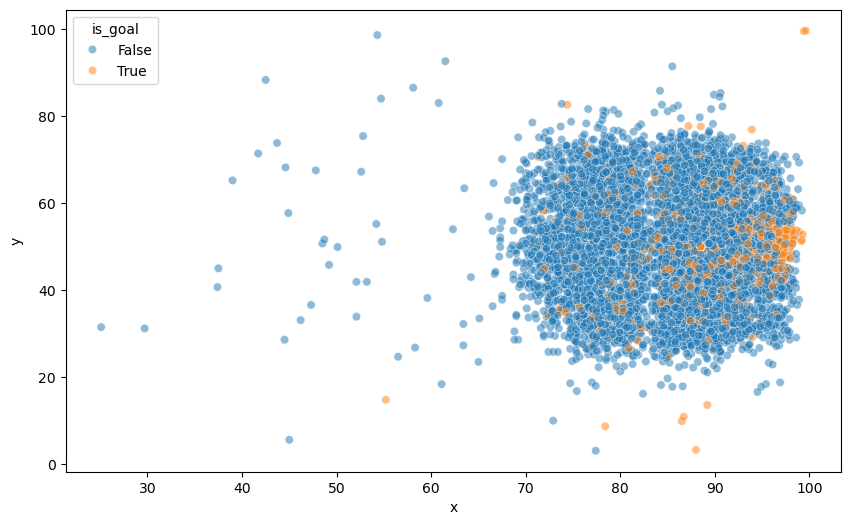

In [29]:
# Plotting the data via scatterplot
plt.figure(figsize=(10, 6))

sns.scatterplot(x='x', y='y', data=df, hue='is_goal', alpha=.5)
plt.show()

In [30]:
# Checking for NULL values
df.isnull().sum()

x                     0
y                     0
is_goal               0
period                0
Assisted           2053
Zone                  0
IndividualPlay     5289
RegularPlay        2714
LeftFoot           5307
RightFoot          4106
FromCorner         6903
FirstTouch         4166
Head               6793
BigChance          6484
SetPiece           7704
Volley             7281
FastBreak          7476
ThrowinSetPiece    7904
Penalty            7985
OneOnOne           7890
KeyPass            8033
OtherBodyPart      8067
dtype: int64

In [31]:
# Filling NULL values with FALSE values
df.fillna(0, inplace=True)

In [32]:
# Checking summary of dtypes
df.dtypes

x                  float64
y                  float64
is_goal               bool
period              object
Assisted            object
Zone                object
IndividualPlay      object
RegularPlay         object
LeftFoot            object
RightFoot           object
FromCorner          object
FirstTouch          object
Head                object
BigChance           object
SetPiece            object
Volley              object
FastBreak           object
ThrowinSetPiece     object
Penalty             object
OneOnOne            object
KeyPass             object
OtherBodyPart       object
dtype: object

In [35]:
# Updating value data types for columns
df = df.astype({
    'x': float,
    'y': float,
    'is_goal': bool,
    'period': str,
    'Assisted': bool,
    'Zone': str,
    'IndividualPlay': bool,
    'RegularPlay': bool,
    'LeftFoot': bool,
    'RightFoot': bool,
    'FromCorner': bool,
    'FirstTouch': bool,
    'Head': bool,
    'BigChance': bool,
    'SetPiece': bool,
    'Volley': bool,
    'FastBreak': bool,
    'ThrowinSetPiece': bool,
    'Penalty': bool,
    'OneOnOne': bool,
    'KeyPass': bool,
    'OtherBodyPart': bool
})

In [36]:
# Checking updated dtypes
df.dtypes

x                  float64
y                  float64
is_goal               bool
period              object
Assisted              bool
Zone                object
IndividualPlay        bool
RegularPlay           bool
LeftFoot              bool
RightFoot             bool
FromCorner            bool
FirstTouch            bool
Head                  bool
BigChance             bool
SetPiece              bool
Volley                bool
FastBreak             bool
ThrowinSetPiece       bool
Penalty               bool
OneOnOne              bool
KeyPass               bool
OtherBodyPart         bool
dtype: object

# Feature Engineering

## Creating model for shot distace

In [37]:
# Calculating the shot distance
df['shot_distance'] = np.sqrt((df['x'] - 100)**2 + (df['y'] - 50)**2)

In [38]:
df.shot_distance

0       19.266551
1       33.077636
2       22.141590
3       11.636151
4       16.323296
          ...    
8113    20.999048
8114     7.665507
8115    16.697305
8116    10.572133
8117    15.686937
Name: shot_distance, Length: 8091, dtype: float64

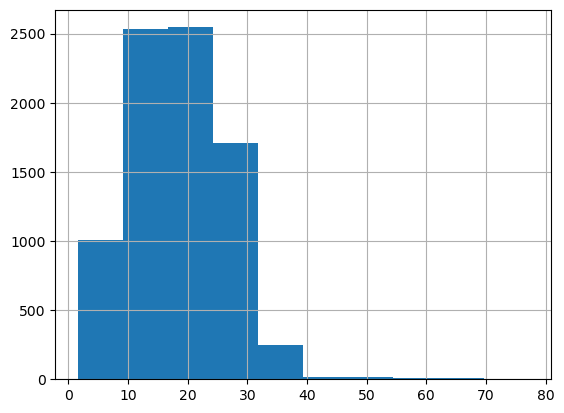

In [40]:
# Plotting Shot Distance via histogram
df['shot_distance'].hist()
plt.show()

#### Most of the shots are being taken from from the 8 to 25ft range

In [41]:
# Summary of Shot Distance
df['shot_distance'].describe()

count    8091.000000
mean       18.495064
std         8.011289
min         1.581139
25%        12.061300
50%        18.380696
75%        24.200207
max        77.150891
Name: shot_distance, dtype: float64

# Encoding the variables

In [42]:
# Viewing values of period column
df.period.value_counts()

period
SecondHalf    4333
FirstHalf     3758
Name: count, dtype: int64

In [43]:
# Creating dummy values for Period and Zone columns
df = pd.get_dummies(df, columns=['period', 'Zone'])

In [44]:
df.columns

Index(['x', 'y', 'is_goal', 'Assisted', 'IndividualPlay', 'RegularPlay',
       'LeftFoot', 'RightFoot', 'FromCorner', 'FirstTouch', 'Head',
       'BigChance', 'SetPiece', 'Volley', 'FastBreak', 'ThrowinSetPiece',
       'Penalty', 'OneOnOne', 'KeyPass', 'OtherBodyPart', 'shot_distance',
       'period_FirstHalf', 'period_SecondHalf', 'Zone_Back', 'Zone_Center',
       'Zone_Left', 'Zone_Right'],
      dtype='object')

In [45]:
# Summary of goals scored/not scored during first half
df.period_FirstHalf.value_counts()

period_FirstHalf
False    4333
True     3758
Name: count, dtype: int64

In [46]:
# Summary of goals scored/not scored during second half
df.period_SecondHalf.value_counts()

period_SecondHalf
True     4333
False    3758
Name: count, dtype: int64

# Building the model

## Training the model

In [48]:
# Defining X and y variables
X = df.drop('is_goal', axis=1)
y = df['is_goal']

In [50]:
# Importing packages for training and testing the data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, brier_score_loss

In [53]:
# Splitting the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# Creating the model
model = LogisticRegression(max_iter=1000)

In [55]:
# Fitting the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [57]:
# Predicting the probabilities of X_test
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [62]:
# Getting the first 10 predictive values of the model
y_pred_proba[:10]

array([0.07374625, 0.35039308, 0.03584597, 0.03819125, 0.1015634 ,
       0.03734041, 0.03603407, 0.04900358, 0.04642051, 0.03841601])

In [63]:
# Assigning predictive values to goal_probability column
final_df = X_test.copy()
final_df['goal_probability'] = y_pred_proba

In [64]:
# Viewing the shot detail and probability of scoring at the 830th row in the data
final_df.iloc[830]

x                         79.1
y                         70.3
Assisted                 False
IndividualPlay           False
RegularPlay              False
LeftFoot                  True
RightFoot                False
FromCorner               False
FirstTouch               False
Head                     False
BigChance                False
SetPiece                 False
Volley                   False
FastBreak                False
ThrowinSetPiece          False
Penalty                  False
OneOnOne                 False
KeyPass                  False
OtherBodyPart            False
shot_distance        29.135889
period_FirstHalf          True
period_SecondHalf        False
Zone_Back                False
Zone_Center               True
Zone_Left                False
Zone_Right               False
goal_probability       0.05864
Name: 1808, dtype: object

#### The data shows the goal was at [79,70] (reference the scatterplot at Visualizing the Data), it was a left footed shot in the center of the field during the first half period. The goal probability was 0.05864 or about 6%.

In [65]:
# Viewing the shot detail and probability of scoring at the 100th row in the data
final_df.iloc[100]

x                        97.0
y                        42.2
Assisted                 True
IndividualPlay          False
RegularPlay              True
LeftFoot                False
RightFoot                True
FromCorner              False
FirstTouch               True
Head                    False
BigChance                True
SetPiece                False
Volley                   True
FastBreak               False
ThrowinSetPiece         False
Penalty                 False
OneOnOne                False
KeyPass                 False
OtherBodyPart           False
shot_distance        8.357033
period_FirstHalf        False
period_SecondHalf        True
Zone_Back               False
Zone_Center              True
Zone_Left               False
Zone_Right              False
goal_probability     0.353818
Name: 7880, dtype: object

#### The data shows the shot at [97,42]. The shot was assisted by another player during a regular play. It was a right footed shot during the first touch with a big chance of scoring. It was vollied with a shot distance of 8.35 during the second half of play. The shot was again from the center of the field with a goal probability of 0.3538 or about 35%. This has a much higher chance of scoring than the previous shot.

# Verifying the scores for the predictive model

In [66]:
# Checking sorted values of high to low probability shots
final_df.sort_values(by='goal_probability', ascending=False).head()

,x,y,Assisted,IndividualPlay,RegularPlay,LeftFoot,RightFoot,FromCorner,FirstTouch,Head,...,KeyPass,OtherBodyPart,shot_distance,period_FirstHalf,period_SecondHalf,Zone_Back,Zone_Center,Zone_Left,Zone_Right,goal_probability
3671,88.5,50.0,False,False,False,True,False,False,False,False,...,False,False,11.5,False,True,False,True,False,False,0.829481
381,88.5,50.0,False,False,False,True,False,False,False,False,...,False,False,11.5,False,True,False,True,False,False,0.829481
6619,88.5,50.0,False,False,False,True,False,False,False,False,...,False,False,11.5,False,True,False,True,False,False,0.829481
1323,88.5,50.0,False,False,False,True,False,False,False,False,...,False,False,11.5,False,True,False,True,False,False,0.829481
3960,88.5,50.0,False,False,False,False,True,False,False,False,...,False,False,11.5,False,True,False,True,False,False,0.826261


#### Based on the data, the highest probability shots (about 83%) are left footed from the center of the field, at a distance of 11.5.

In [67]:
# Measuring log loss of prediction model
log_loss(y_test, y_pred_proba)

0.26994732136316835

#### Log loss measures how well the model is able to predict the probability of the classes. Here, we are given a log loss of .02699. The closer to zero, the better. This is a fine result based on the model.

In [68]:
# Finding the area under the curve
roc_auc_score(y_test, y_pred_proba)

0.8097523102560218

#### The ROC curve is used to evaluate the model's ability to separate classes. The result of 0.81 is a very good score, showing the model is working well.

In [69]:
# Calculating brier score loss
brier_score_loss(y_test, y_pred_proba)

0.07735024424425517

#### The brier score loss measures the sqaured mean difference between the probabilities. We want this number to be as low as possible and with a score of 0.077, this score is really good.

# Plotting the XG Model

In [70]:
# Importing Pitch from mplsoccer
from mplsoccer import Pitch
pitch = Pitch(pitch_type='opta')

In [79]:
# Importing package for matplotlib colors via Linear Segmented Color map
from matplotlib.colors import LinearSegmentedColormap
colors = ['red', 'yellow', 'green']

cmap = LinearSegmentedColormap.from_list('my_colormap', colors)

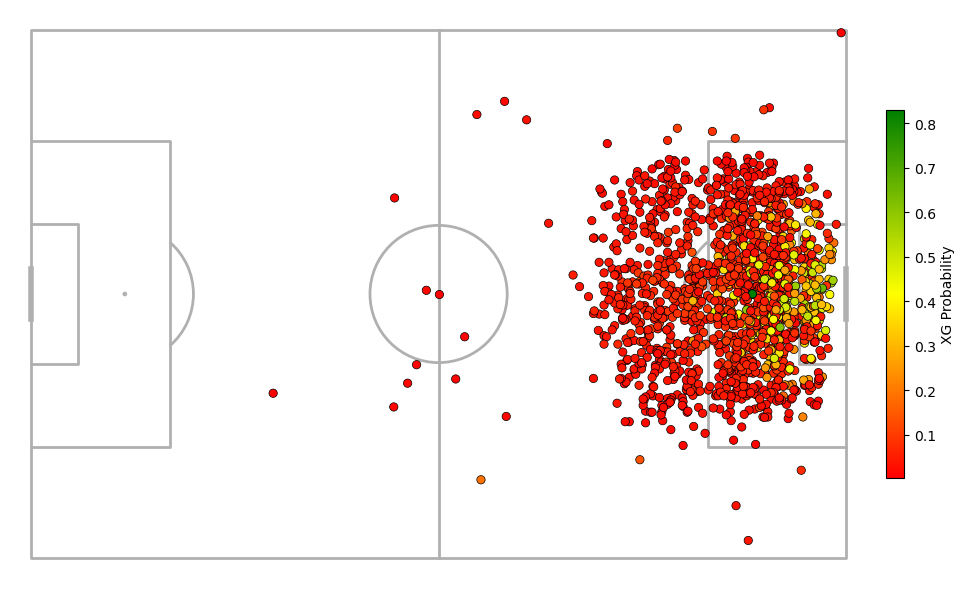

In [80]:
fig, ax = pitch.draw(figsize=(10, 6))

sc = pitch.scatter(
    final_df['x'],
    final_df['y'],
    c=final_df['goal_probability'],
    cmap=cmap,
    edgecolors='black',
    linewidth=.5,
    ax=ax
)

cbar = plt.colorbar(sc, ax=ax, orientation='vertical', fraction=.02, pad=.02)
cbar.set_label('XG Probability')
        